**SIR Model:**

The model is mainly used for infectious based analysis. For the novelty, we integrated the ridge regression with the SIR model. SIR model is mainly based on the three differential equations which tells us about the rate of change of (S,I,R). The three differential equations are:

dS/dt = -βSI

dI/dt = βSI - γI

dR/dt = γI

where:

S is the number of susceptible individuals, that is, the individuals who are not infected but can get infected.

I is the number of infected individuals

R is the number of recovered individuals, that is, the individuals who are recovered and dead.

β is the rate of transmission (how quickly the disease spreads from infected to susceptible individuals)

γ is the recovery rate (how quickly infected individuals recover and become immune to the disease)

*   The first equation shows how the susceptible population decreases as people become infected, with the term -βSI representing the infection rate.
*   The second equation explains how the infected population changes: it grows as new infections occur (βSI) and shrinks as infected individuals recover (γI).
*   The third equation tracks the recovered population, which increases as infected people heal and become immune, represented by γI.
*   Despite its simplicity, the SIR model is a powerful tool for understanding disease dynamics and has been widely used to guide public health strategies during infectious disease outbreaks.

**Assumptions:**

- The population is well-mixed, meaning that each individual has an equal chance of coming into contact with any other individual in the population.

- The disease spreads through direct contact between individuals.

- The rate of transmission depends on the number of infected individuals in the population.

Here, we used SIR model along with ridge regression (novelty) for analyzing the dataset for predicting the recovery rate and transmission rate using the past 15 days and predicting for the next 20 days. Which is very useful for making decisions in healthcare centers and so on

In [ ]:
import pandas as pd
import numpy as np
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

In [ ]:
df = pd.read_csv("/content/covid_19_data.csv")

df = df.drop(columns=["Province/State", "Country/Region", "Last Update"])

dates = []
confirmed_total = []
deaths_total = []
recovered_total = []
sno_collections = []

grouped = df.groupby("ObservationDate")

for date, group in grouped:
    dates.append(date)
    confirmed_total.append(group["Confirmed"].sum())
    deaths_total.append(group["Deaths"].sum())
    recovered_total.append(group["Recovered"].sum())
    sno_collections.append(group["SNo"].tolist())

result = pd.DataFrame({
    "ObservationDate": dates,
    "Confirmed": confirmed_total,
    "Deaths": deaths_total,
    "Recovered": recovered_total,
    "SNo": sno_collections
})

In [ ]:
result

,ObservationDate,Confirmed,Deaths,Recovered,SNo
0,01/01/2021,84092619.0,1834675.0,47313005.0,"[192467, 192468, 192469, 192470, 192471, 19247..."
1,01/02/2021,84718978.0,1843108.0,47614297.0,"[193230, 193231, 193232, 193233, 193234, 19323..."
2,01/03/2021,85251774.0,1850449.0,47882779.0,"[193993, 193994, 193995, 193996, 193997, 19399..."
3,01/04/2021,85805892.0,1860598.0,48173187.0,"[194757, 194758, 194759, 194760, 194761, 19476..."
4,01/05/2021,86546014.0,1875953.0,48488548.0,"[195521, 195522, 195523, 195524, 195525, 19552..."
...,...,...,...,...,...
408,12/27/2020,80912611.0,1771659.0,45717710.0,"[188652, 188653, 188654, 188655, 188656, 18865..."
409,12/28/2020,81408934.0,1781415.0,46016136.0,"[189415, 189416, 189417, 189418, 189419, 18942..."
410,12/29/2020,82073362.0,1796786.0,46369231.0,"[190178, 190179, 190180, 190181, 190182, 19018..."
411,12/30/2020,82834592.0,1811843.0,46757476.0,"[190941, 190942, 190943, 190944, 190945, 19094..."


In [ ]:
result = result.sort_values(by='SNo')
result = result.drop(["SNo"], axis =1 )
data = pd.DataFrame()

data["Confirmed"] = result['Confirmed'].cumsum()
data["Deaths"] = result['Deaths'].cumsum()
data["Recovered"] = result['Recovered'].cumsum()
data = data.reset_index()
data = data.drop(["index"], axis =1)
test_data = data
test_data = test_data.tail(50)
data = data

In [ ]:
test_data

,Confirmed,Deaths,Recovered
363,9.355143e+09,260413548.0,5.698022e+09
364,9.452088e+09,262496216.0,5.751421e+09
365,9.549689e+09,264595673.0,5.805187e+09
366,9.647949e+09,266711151.0,5.859334e+09
367,9.746777e+09,268839923.0,5.913798e+09
368,9.846051e+09,270977663.0,5.968572e+09
369,9.945822e+09,273126171.0,6.023661e+09
370,1.004615e+10,275291987.0,6.079080e+09
371,1.014708e+10,277474483.0,6.134839e+09
372,1.024861e+10,279674030.0,6.190914e+09


In [ ]:
data

,Confirmed,Deaths,Recovered
0,5.570000e+02,17.0,3.000000e+01
1,1.654000e+03,51.0,9.000000e+01
2,2.595000e+03,77.0,1.290000e+02
3,4.032000e+03,119.0,1.710000e+02
4,6.150000e+03,175.0,2.270000e+02
...,...,...,...
408,1.418537e+10,366436278.0,8.398019e+09
409,1.430192e+10,369026169.0,8.463866e+09
410,1.441883e+10,371621334.0,8.529950e+09
411,1.453605e+10,374223359.0,8.596309e+09


In [ ]:
def dataset(data, orders):
    x_train = []
    for i in range(len(data)  - orders):
        x_train.append(data[i:orders + i])
    return np.array(x_train), data[orders:]

In [ ]:
population = 143932377600
X_confirmed = np.array(data["Confirmed"])
recovered = np.array(data["Recovered"])
death = np.array(data["Deaths"])


X = X_confirmed - recovered - death #indicating Infected people
R = recovered + death # indicating recovered
n = np.array([population] * len(X), dtype=np.float64)
S = n - X - R # indicating people who are still not been affected by the disease

In [ ]:
gamma = (R[1:] - R[:-1]) / X[:-1] #rate at which people recover or die
beta = n[:-1] * (X[1:] - X[:-1] + R[1:] - R[:-1]) / (X[:-1] * (n[:-1] - X[:-1] - R[:-1])) #Transmission rate that is average number of contacts of a person per day
R0 = beta / gamma  #reproduction number that is total number of infections a infectious person creates

In [ ]:
x_beta, y_beta = dataset(beta, 15)
x_gamma, y_gamma = dataset(gamma, 15)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

beta_ = Ridge(alpha=0.1, fit_intercept=False)
gamma_ = Ridge(alpha=0.1, fit_intercept=False)
beta_.fit(x_beta, y_beta)
gamma_.fit(x_gamma, y_gamma)

beta_pred = beta_.predict(x_beta)
gamma_pred = beta_.predict(x_gamma)

In [ ]:
S_predict = [S[-1]]
X_predict = [X[-1]]
R_predict = [R[-1]]

predict_beta = np.array(beta[-15:]).tolist()
predict_gamma = np.array(gamma[-15:]).tolist()
print(S_predict)
print(X_predict)
print(R_predict)

[np.float64(129299683383.0)]
[np.float64(5607972264.0)]
[np.float64(9024721953.0)]


In [ ]:
for i in range(20):
    padded_beta = predict_beta[-15:] + [0] * (15 - len(predict_beta[-15:]))
    padded_gamma = predict_gamma[-15:] + [0] * (15 - len(predict_gamma[-15:]))

    next_beta = beta_.predict(np.asarray([padded_beta]))[0]
    next_gamma = gamma_.predict(np.asarray([padded_gamma]))[0]
    if next_beta<0:
        predict_beta.append(0)
    else:
        predict_beta.append(next_beta)

    if next_gamma<0:
        predict_gamma.append(0)
    else:
        predict_gamma.append(next_gamma)

    S_predict.append(((-predict_beta[-1] * S_predict[-1] * X_predict[-1]) / n[-1]) + S_predict[-1])
    X_predict.append(((predict_beta[-1] * S_predict[-1] * X_predict[-1]) / n[-1]) - (predict_gamma[-1] * X_predict[-1]) + X_predict[-1])
    R_predict.append((predict_gamma[-1] * X_predict[-1]) + R_predict[-1])

In [ ]:
def plot():
    plt.figure(1)
    plt.title('SIR Model')
    plt.plot(range(len(X) - 1, len(X) - 1 + len(X_predict)), X_predict, 'o' ,label="Positive Cases", color='darkorange')
    plt.plot(range(len(X) - 1, len(X) - 1 + len(X_predict)), R_predict, 'o', label="Recovered + Death", color='blue')
    plt.plot(range(300,len(X)), X[300:], 'o', label="Predicted Positive Cases", color='red')
    plt.plot(range(300, len(X)), R[300:], 'o', label="Predicted Recovered + Death", color='darkblue')
    plt.xlabel('Time Line(in days)')
    plt.ylabel('Count')
    plt.legend()
    plt.show()

**************************************************
Covid-19 infected cases:  5649574357
Recovered + Deaths:  9093945060
Expected Confirmed cases:  14743519417
**************************************************


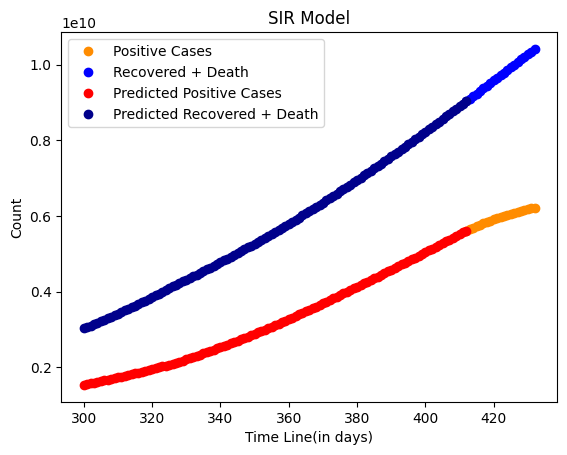

In [ ]:
print("*"*50)
print("Covid-19 infected cases: ", int(X_predict[1]))
print("Recovered + Deaths: ", int(R_predict[1]))
print("Expected Confirmed cases: ",int(X_predict[1] + R_predict[1]))
print("*"*50)
plot()